In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation
import pandas as pd
import math
import tensorflow as tf
from lib.pinn import PINN
from lib.network import Network
from utilities import print_t
import pathlib
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.set_printoptions(precision=3, suppress=True) 

In [12]:
from parameters import p

In [4]:
# network = Network.build(layers=[100,100,100,100,101], activation='sigmoid', **p)
network = Network.build(layers=[100,100,100], **p)
pinn = PINN(network, **p).build(**p)
pinn.compile(optimizer='adam', loss='mse')
# if pathlib.Path("weights.h5").exists():
#     pinn.load_weights("weights.h5")

In [14]:
n_train_samples = 4000000

min_d = p["min_dim"]
max_d = p["max_dim"]
size = p["size"]
padding = size/10000


def correct_bounds(x):
    for i in range(p["dim"]):
        x[(x[:, i] < min_d[i] + padding[i]) | (x[:, i] > max_d[i]-padding[i]), i] = (min_d + max_d)[i]/2


x_train = np.random.rand(n_train_samples, 1+p["dim"]) * size + min_d
x_train_left = np.random.rand(n_train_samples, 1+p["dim"]) * size + min_d
correct_bounds(x_train)
x_train_left[:, 1] = min_d[1]
# print(x_train_left)
x_train_right = np.random.rand(n_train_samples, 1+p["dim"]) * size + min_d
x_train_right[:, 1] = max_d[1]
x_train_start = np.random.rand(n_train_samples, 1+p["dim"]) * size + min_d
x_train_start[:, 0] = min_d[0]
Fi_start = np.interp(x_train_start[:, 1], p["Fi_start"][:, 0], p["Fi_start"][:, 1])
x = [x_train, x_train_left, x_train_right, x_train_start, Fi_start]

# y = {name: np.zeros((n_train_samples, 1)) for name in ["eq1", "eq2", "eq3", "eq4",
#                      "cl", "vl", "Fil",
#                      "cr", "vr", "Fir",
#                      "cs", "vs", "Fis"]}

y = [np.zeros((n_train_samples, 1))] * len(pinn.output)

pinn.fit(x=x, y=y)
# pinn.save_weights('weights.h5')


125000/125000 [==============================] - 737s 6ms/step - loss: 0.0034 - tf.__operators__.add_loss: 5.2828e-07 - tf.__operators__.add_1_loss: 6.3220e-04 - tf.__operators__.add_5_loss: 0.0018 - gradient_layer_loss: 2.4704e-05 - tf.math.subtract_1_loss: 6.3855e-05 - tf.math.subtract_2_loss: 1.0060e-04 - tf.math.subtract_3_loss: 1.1439e-04 - tf.math.subtract_4_loss: 5.2123e-05 - tf.math.subtract_5_loss: 9.7109e-05 - tf.math.subtract_6_loss: 6.6238e-05 - tf.math.subtract_7_loss: 9.7972e-06 - tf.math.subtract_8_loss: 1.1005e-04 - tf.math.subtract_9_loss: 3.5924e-04


In [6]:
dict([("kek", 1),("keks", 1)])

{'kek': 1, 'keks': 1}

In [ ]:
pinn.save_weights("weights.h5")

In [15]:
num_test_samples = 30
dims = np.linspace(p["min_dim"], p["max_dim"], num_test_samples).T
# print(dims)
dims = np.split(dims.flatten(), p["dim"]+1)
# print(dims)
mdims = np.meshgrid(*dims, indexing='ij')
# print(mdims)
txyz = np.stack([mdim.flatten() for mdim in mdims], axis=-1)
# print(txyz)
c, v, Fi = network.predict(txyz, batch_size=num_test_samples)

27000/27000 [==============================] - 15s 548us/step


In [ ]:
Fii = np.loadtxt("Fi.dat")
np.interp([-24.5, 24.5], Fii[:, 0], Fii[:, 1])

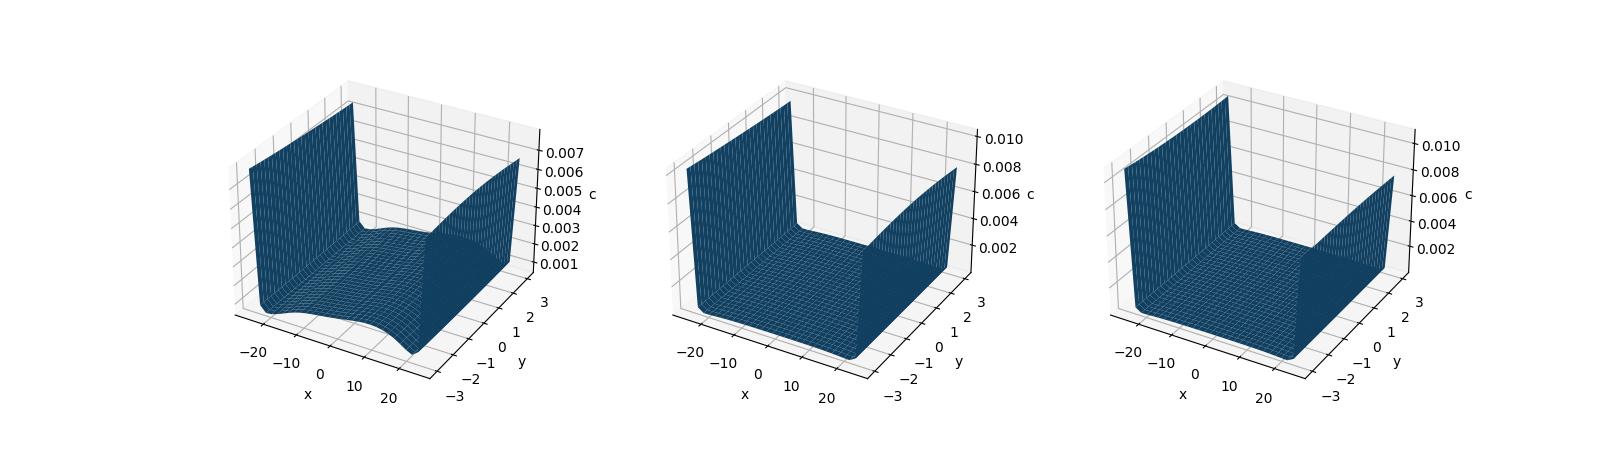

In [19]:
c = c.reshape(mdims[0].shape)
time_t = 20
fig = plt.figure(figsize=(16, 4.5))

ax1 = fig.add_subplot(131,projection="3d")
# ax1.plot(dims[1], c[(0, slice(None),) + tuple(int(d/2) for d in p["max_dim"][2:])])
ax1.plot_surface(*np.meshgrid(dims[1], dims[2], indexing='ij'), c[0,...,int(p["size"][3]/2)])
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("c")

ax2 = fig.add_subplot(132,projection="3d")
# ax1.plot(dims[1], c[(0, slice(None),) + tuple(int(d/2) for d in p["max_dim"][2:])])
ax2.plot_surface(*np.meshgrid(dims[1], dims[2], indexing='ij'), c[10,...,int(p["size"][3]/2)])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("c")

ax3 = fig.add_subplot(133,projection="3d")
# ax1.plot(dims[1], c[(0, slice(None),) + tuple(int(d/2) for d in p["max_dim"][2:])])
ax3.plot_surface(*np.meshgrid(dims[1], dims[2], indexing='ij'), c[20,...,int(p["size"][3]/2)])
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel("c")

plt.show()


In [24]:

(s for s in p["size"][2:] / 2)

SyntaxError: invalid syntax (482853534.py, line 1)

In [11]:
np.interp(-5, [1],[4])

4.0

In [36]:
np.array([1,2])[-2]

1

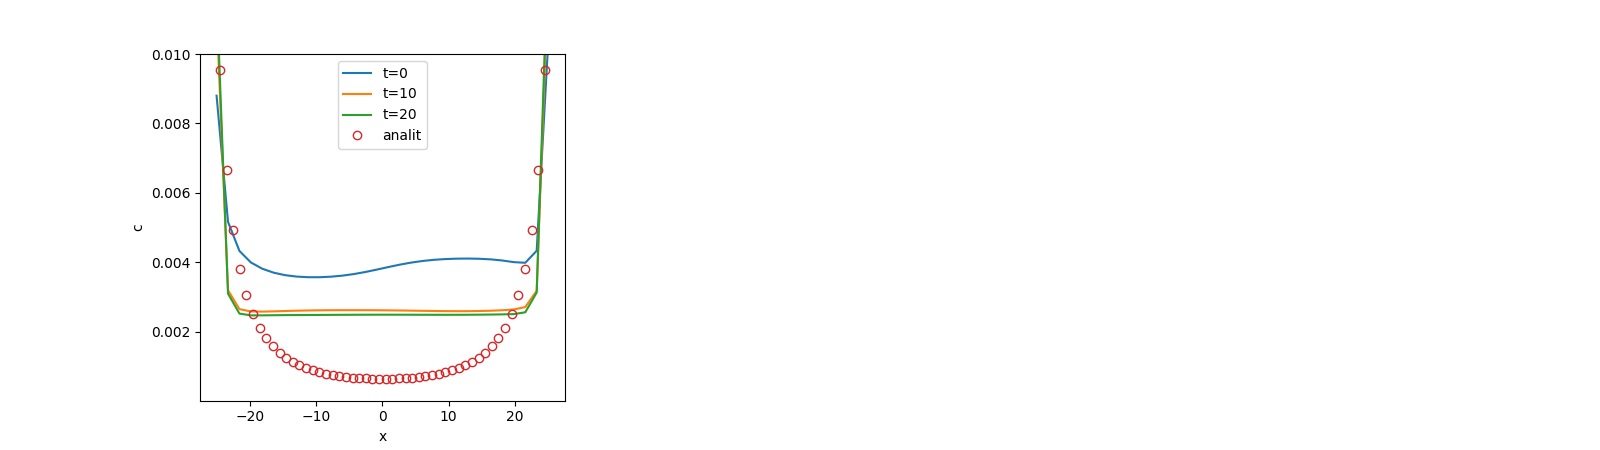

In [16]:
c = c.reshape(mdims[0].shape)
time_t = 20
fig = plt.figure(figsize=(16, 4.5))

axc = fig.add_subplot(131)
other_dim = tuple(int(s) for s in p["size"][2:] / 2)
axc.plot(dims[1], c[(0, slice(None),) + other_dim], label='t=0')
axc.plot(dims[1], c[(10, slice(None),) + other_dim], label='t=10')
axc.plot(dims[1], c[(20, slice(None),) + other_dim], label='t=20')

analit = np.loadtxt("eof_analytical.dat")
axc.plot(analit[:, 0], analit[:, 1], 'o', mfc="none", label='analit')

axc.set_xlabel("x")
axc.set_ylabel("c")
axc.legend(loc='best')
axc.set_ylim(top=0.01)

plt.show()


In [17]:
v[0,:, 0, 0]

array([[0.006, 0.024, 0.013],
       [0.007, 0.024, 0.013],
       [0.007, 0.024, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.006, 0.024, 0.013],
       [0.006, 0.021, 0.013],
       [0.005, 0.018, 0.013],
       [0.005, 0.015, 0.013],
       [0.005, 0.012, 0.013],
       [0.005, 0.01 , 0.013],
       [0.005, 0.009, 0.013],
       [0.005, 0.008, 0.012],
       [0.005, 0.008, 0.012],
       [0.005, 0.009, 0.012],
       [0.005, 0.01 , 0.013],
       [0.005, 0.012, 0.013],
       [0.005, 0.015, 0.013],
       [0.005, 0.018, 0.013],
       [0.006, 0.022, 0.013],
       [0.007, 0.024, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.025, 0.013],
       [0.007, 0.024, 0.013],
       [0.007, 0.024, 0.013]], dtype=float32)

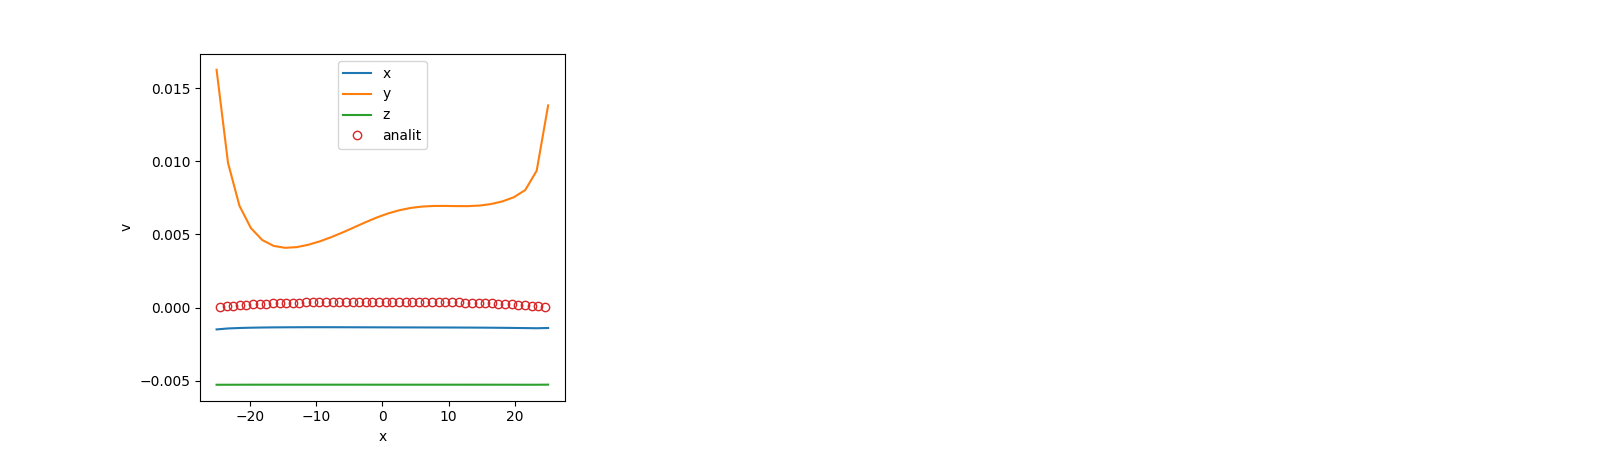

In [17]:
v = v.reshape(mdims[0].shape+(-1,))
fig = plt.figure(figsize=(16, 4.5))

ax1 = fig.add_subplot(131)
# ax1.plot(dims[1], c[(0, slice(None),) + tuple(int(d/2) for d in p["max_dim"][2:])])
ax1.plot(dims[1], v[(0, slice(None),) + other_dim + (0,)], label="x")
ax1.plot(dims[1], v[(0, slice(None),) + other_dim + (1,)], label="y")
ax1.plot(dims[1], v[(0, slice(None),) + other_dim + (2,)], label="z")
ax1.plot(analit[:,0], analit[:,2], 'o', mfc="none", label="analit")
ax1.set_xlabel("x")
ax1.set_ylabel("v")
# ax1.set_ylim(0, 0.04)
ax1.legend(loc='best')

# ax2 = fig.add_subplot(132)
# # ax1.plot(dims[1], c[(0, slice(None),) + tuple(int(d/2) for d in p["max_dim"][2:])])
# ax2.plot(dims[1], v[-1,:, 0, 0, 0], label="x")
# ax2.plot(dims[1], v[-1,:, 0, 0, 1], label="y")
# ax2.plot(dims[1], v[-1,:, 0, 0, 2], label="z")
# ax2.set_xlabel("x")
# ax2.set_ylabel("v")
# ax2.set_ylim(0, 0.04)
# ax2.legend(loc='best')


In [ ]:
network(tf.constant([[0.,0.,dims[2][1]]]))

In [13]:
r = pinn([tf.constant([[0.,p["min_dim"][1],0.,0]])]*4)
[res.numpy() for res in r]

[array([[0.001]], dtype=float32),
 array([[0.02]], dtype=float32),
 array([[-0.   , -0.002, -0.   ]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[-0.002]], dtype=float32),
 array([[ 0.001,  0.006, -0.001]], dtype=float32),
 array([[-0.001]], dtype=float32),
 array([[-0.002]], dtype=float32),
 array([[ 0.001,  0.006, -0.001]], dtype=float32),
 array([[-0.001]], dtype=float32),
 array([[0.006]], dtype=float32),
 array([[ 0.001,  0.006, -0.001]], dtype=float32),
 array([[-0.001]], dtype=float32)]

In [ ]:
c[0,-1,1]

In [ ]:
network(np.array([[p["max_t"], p["max_x"], p["max_y"], p["max_z"]]]))

In [ ]:
np.meshgrid(np.zeros(2), np.zeros(3))

In [ ]:
n_test_samples = 2
max_d = np.array([p["max_t"], p["max_x"], p["max_y"], p["max_z"]])
x_train = np.random.rand(n_test_samples, 4) * max_d
x_train_left = np.random.rand(n_test_samples, 4) * max_d
x_train_left[:,1] = 0
x_train_right = np.random.rand(n_test_samples, 4) * max_d
x_train_right[:,1] = 0
x=[x_train, x_train_left, x_train_right]
for i, xx in enumerate(pinn(x)):
    print(i, ":", xx.shape)
